http://www.ercot.com/gridinfo/load

The archives are also there:
http://www.ercot.com/gridinfo/load/load_hist

There is a difference between the archives and real time, as I have learned :) The real time is based on telemetry substation data, whereas the historical is based on final values. This usually accounts for about a 1% difference, mostly white noise. It would be a good exercise for students to both correct this historical bias and also build timeseries forecasting models on this live data feed. ERCOT also publishes their own load forecasts, so you can use that as a good baseline for any model.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

In [3]:
import pandas as pd

In [4]:
!sudo pip3 install xlrd

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [5]:
# http://www.ercot.com/gridinfo/load/load_hist


### 2018

In [6]:
!curl "http://www.ercot.com/content/wcm/key_documents_lists/89022/native_load_2018.zip" -o native_load_2018.zip
!unzip -o native_load_2018.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  800k  100  800k    0     0   698k      0  0:00:01  0:00:01 --:--:--  698k
Archive:  native_load_2018.zip
  inflating: Native_Load_2018.xlsx   


In [7]:
import datetime as dt

def str_to_datetime(date_str):
    if date_str.endswith("24:00"):
        return pd.to_datetime(date_str[:10], format="%m/%d/%Y") + dt.timedelta(days=1)
    else:
        return pd.to_datetime(date_str, format="%m/%d/%Y %H:%M")

In [8]:
df2018 = pd.read_excel("Native_Load_2018.xlsx")

df2018['date'] = df2018["HourEnding"].apply(str_to_datetime)
df2018.drop('HourEnding', inplace=True, axis='columns')
df2018.set_index('date', inplace=True)

In [9]:
len(df2018)/24

272.9583333333333

### 2017

In [10]:
!curl "http://www.ercot.com/content/wcm/key_documents_lists/89022/native_load_2017.zip" -o native_load_2017.zip
!unzip -o native_load_2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1093k  100 1093k    0     0  1107k      0 --:--:-- --:--:-- --:--:-- 1106k
Archive:  native_load_2017.zip
  inflating: native_Load_2017.xlsx   


In [11]:
df2017 = pd.read_excel("native_Load_2017.xlsx")

In [12]:
import re
for g in df2017["Hour Ending"].values:
    if not re.match(r"^\d\d/\d\d/\d\d\d\d \d\d:\d\d$",g):
        print(g)

11/05/2017 02:00 DST


In [13]:
df2017["Hour Ending"].replace("11/05/2017 02:00 DST", "11/05/2017 02:00", inplace=True)

In [14]:
df2017['date'] = df2017["Hour Ending"].apply(str_to_datetime)
df2017.drop('Hour Ending', inplace=True, axis='columns')
df2017.set_index('date', inplace=True)

In [15]:
len(df2017)/24

365.0

### 2016

In [16]:
!curl "http://www.ercot.com/content/wcm/key_documents_lists/89022/native_Load_2016.zip" -o native_load_2016.zip
!unzip -o native_load_2016.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1095k  100 1095k    0     0   862k      0  0:00:01  0:00:01 --:--:--  862k
Archive:  native_load_2016.zip
  inflating: native_Load_2016.xlsx   


In [17]:
df2016 = pd.read_excel("native_Load_2016.xlsx")

In [18]:
df2016.dtypes

Hour_End    datetime64[ns]
COAST              float64
EAST               float64
FAR_WEST           float64
NORTH              float64
NORTH_C            float64
SOUTHERN           float64
SOUTH_C            float64
WEST               float64
ERCOT              float64
dtype: object

In [19]:
df2016.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [20]:
df2016.set_index('date', inplace=True)

In [21]:
df2016 = df2016.fillna(method="ffill")

In [22]:
len(df2016)/24

366.0

### 2015

In [23]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/native_Load_2015.xls" -o native_load_2015.xls


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1834k      0 --:--:-- --:--:-- --:--:-- 1834k


In [24]:
df2015 = pd.read_excel("native_load_2015.xls")

In [25]:
df2015.head(3)

Hour_End        COAST         EAST     FAR_WEST       NORTH  \
0 2015-01-01 01:00:00.003  9844.200268  1350.784678  2078.060021  901.770195   
1 2015-01-01 01:59:59.997  9653.456269  1333.434943  2057.993265  890.150373   
2 2015-01-01 03:00:00.000  9502.299659  1323.908498  2039.019542  880.926639   

        NORTH_C     SOUTHERN      SOUTH_C         WEST         ERCOT  
0  13640.024978  3607.904503  6731.301663  1470.814721  39624.861027  
1  13425.121941  3609.619438  6602.935629  1440.832944  39013.544802  
2  13286.070909  3573.158363  6530.663273  1430.495044  38566.541927

In [26]:
df2015.dtypes

Hour_End    datetime64[ns]
COAST              float64
EAST               float64
FAR_WEST           float64
NORTH              float64
NORTH_C            float64
SOUTHERN           float64
SOUTH_C            float64
WEST               float64
ERCOT              float64
dtype: object

In [27]:
df2015.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [28]:
df2015.set_index('date', inplace=True)

In [29]:
len(df2015)/24

365.0

### 2014

In [30]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2014_ERCOT_Hourly_Load_Data.xls" -o native_load_2014.xls


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  8531k      0 --:--:-- --:--:-- --:--:-- 8490k


In [31]:
df2014 = pd.read_excel("native_load_2014.xls")

In [32]:
df2014.head(3)

Hour_End        COAST         EAST     FAR_WEST       NORTH  \
0 2014-01-01 01:00:00.003  9101.691219  1338.197939  1820.206244  793.458458   
1 2014-01-01 01:59:59.997  8907.975782  1328.940064  1809.180861  791.141630   
2 2014-01-01 03:00:00.000  8738.460973  1317.990846  1804.524573  789.791906   

        NORTH_C     SOUTHERN      SOUTH_C         WEST         ERCOT  
0  12298.801147  3236.109065  6121.146143  1102.523505  35812.133719  
1  12297.109823  3246.493375  6091.018850  1098.774771  35570.635156  
2  12285.295247  3217.721388  6060.017515  1097.716762  35311.519210

In [33]:
df2014.dtypes

Hour_End    datetime64[ns]
COAST              float64
EAST               float64
FAR_WEST           float64
NORTH              float64
NORTH_C            float64
SOUTHERN           float64
SOUTH_C            float64
WEST               float64
ERCOT              float64
dtype: object

In [34]:
df2014.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [35]:
df2014.set_index('date', inplace=True)

In [36]:
len(df2014)/24

365.0

### 2013

In [37]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2013_ERCOT_Hourly_Load_Data.xls" -o native_load_2013.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1644k      0  0:00:01  0:00:01 --:--:-- 1644k


In [38]:
df2013 = pd.read_excel("native_load_2013.xls")

In [39]:
df2013.head(3)

Hour_End        COAST         EAST     FAR_WEST       NORTH  \
0 2013-01-01 01:00:00.003  7607.189871  1074.024285  1411.823159  763.069242   
1 2013-01-01 01:59:59.997  7389.267519  1035.189180  1403.601093  754.425986   
2 2013-01-01 03:00:00.000  7179.748411  1036.216739  1395.131213  746.215515   

        NORTH_C     SOUTHERN      SOUTH_C        WEST         ERCOT  
0  10370.322921  2206.945802  4368.528687  883.029500  28684.933467  
1  10153.942806  2160.082197  4233.635250  872.532258  28002.676290  
2   9989.243532  2065.369913  4082.897707  868.951334  27363.774363

In [40]:
df2013.dtypes

Hour_End    datetime64[ns]
COAST              float64
EAST               float64
FAR_WEST           float64
NORTH              float64
NORTH_C            float64
SOUTHERN           float64
SOUTH_C            float64
WEST               float64
ERCOT              float64
dtype: object

In [41]:
df2013.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)

In [42]:
df2013.set_index('date', inplace=True)

In [43]:
len(df2013)/24

365.0

### 2012

In [44]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2012_ERCOT_Hourly_Load_Data.xls" -o native_load_2012.xls
df2012 = pd.read_excel("native_load_2012.xls")
df2012.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2012.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1762k  100 1762k    0     0  1557k      0  0:00:01  0:00:01 --:--:-- 1557k


In [45]:
len(df2012)/24

366.0

### 2011



In [46]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2011_ERCOT_Hourly_Load_Data.xls" -o native_load_2011.xls
df2011 = pd.read_excel("native_load_2011.xls")
df2011.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2011.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  9012k      0 --:--:-- --:--:-- --:--:-- 9012k


In [47]:
len(df2011)/24

365.0

### 2010

In [48]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2010_ERCOT_Hourly_Load_Data.xls" -o native_load_2010.xls
df2010 = pd.read_excel("native_load_2010.xls")
df2010.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2010.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1648k      0  0:00:01  0:00:01 --:--:-- 1648k


In [49]:
len(df2010)/24

365.0

In [50]:
!curl "http://www.ercot.com/content/gridinfo/load/load_hist/2009_ERCOT_Hourly_Load_Data.xls" -o native_load_2009.xls
df2009 = pd.read_excel("native_load_2009.xls")
df2009.rename({
    "Hour_End": "date",
    "FAR_WEST": "FWEST",
    "NORTH_C": "NCENT",
    "SOUTHERN": "SOUTH",
    "SOUTH_C": "SCENT"
    },
    inplace=True,
    axis='columns'
)
df2009.set_index('date', inplace=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1757k  100 1757k    0     0  1963k      0 --:--:-- --:--:-- --:--:-- 1961k


In [51]:
len(df2009)/24

365.0

### Concatenate 

In [52]:
df = pd.concat([df2017, df2016, df2015, df2014, df2013, df2012, df2011, df2010, df2009], axis='index').sort_index()

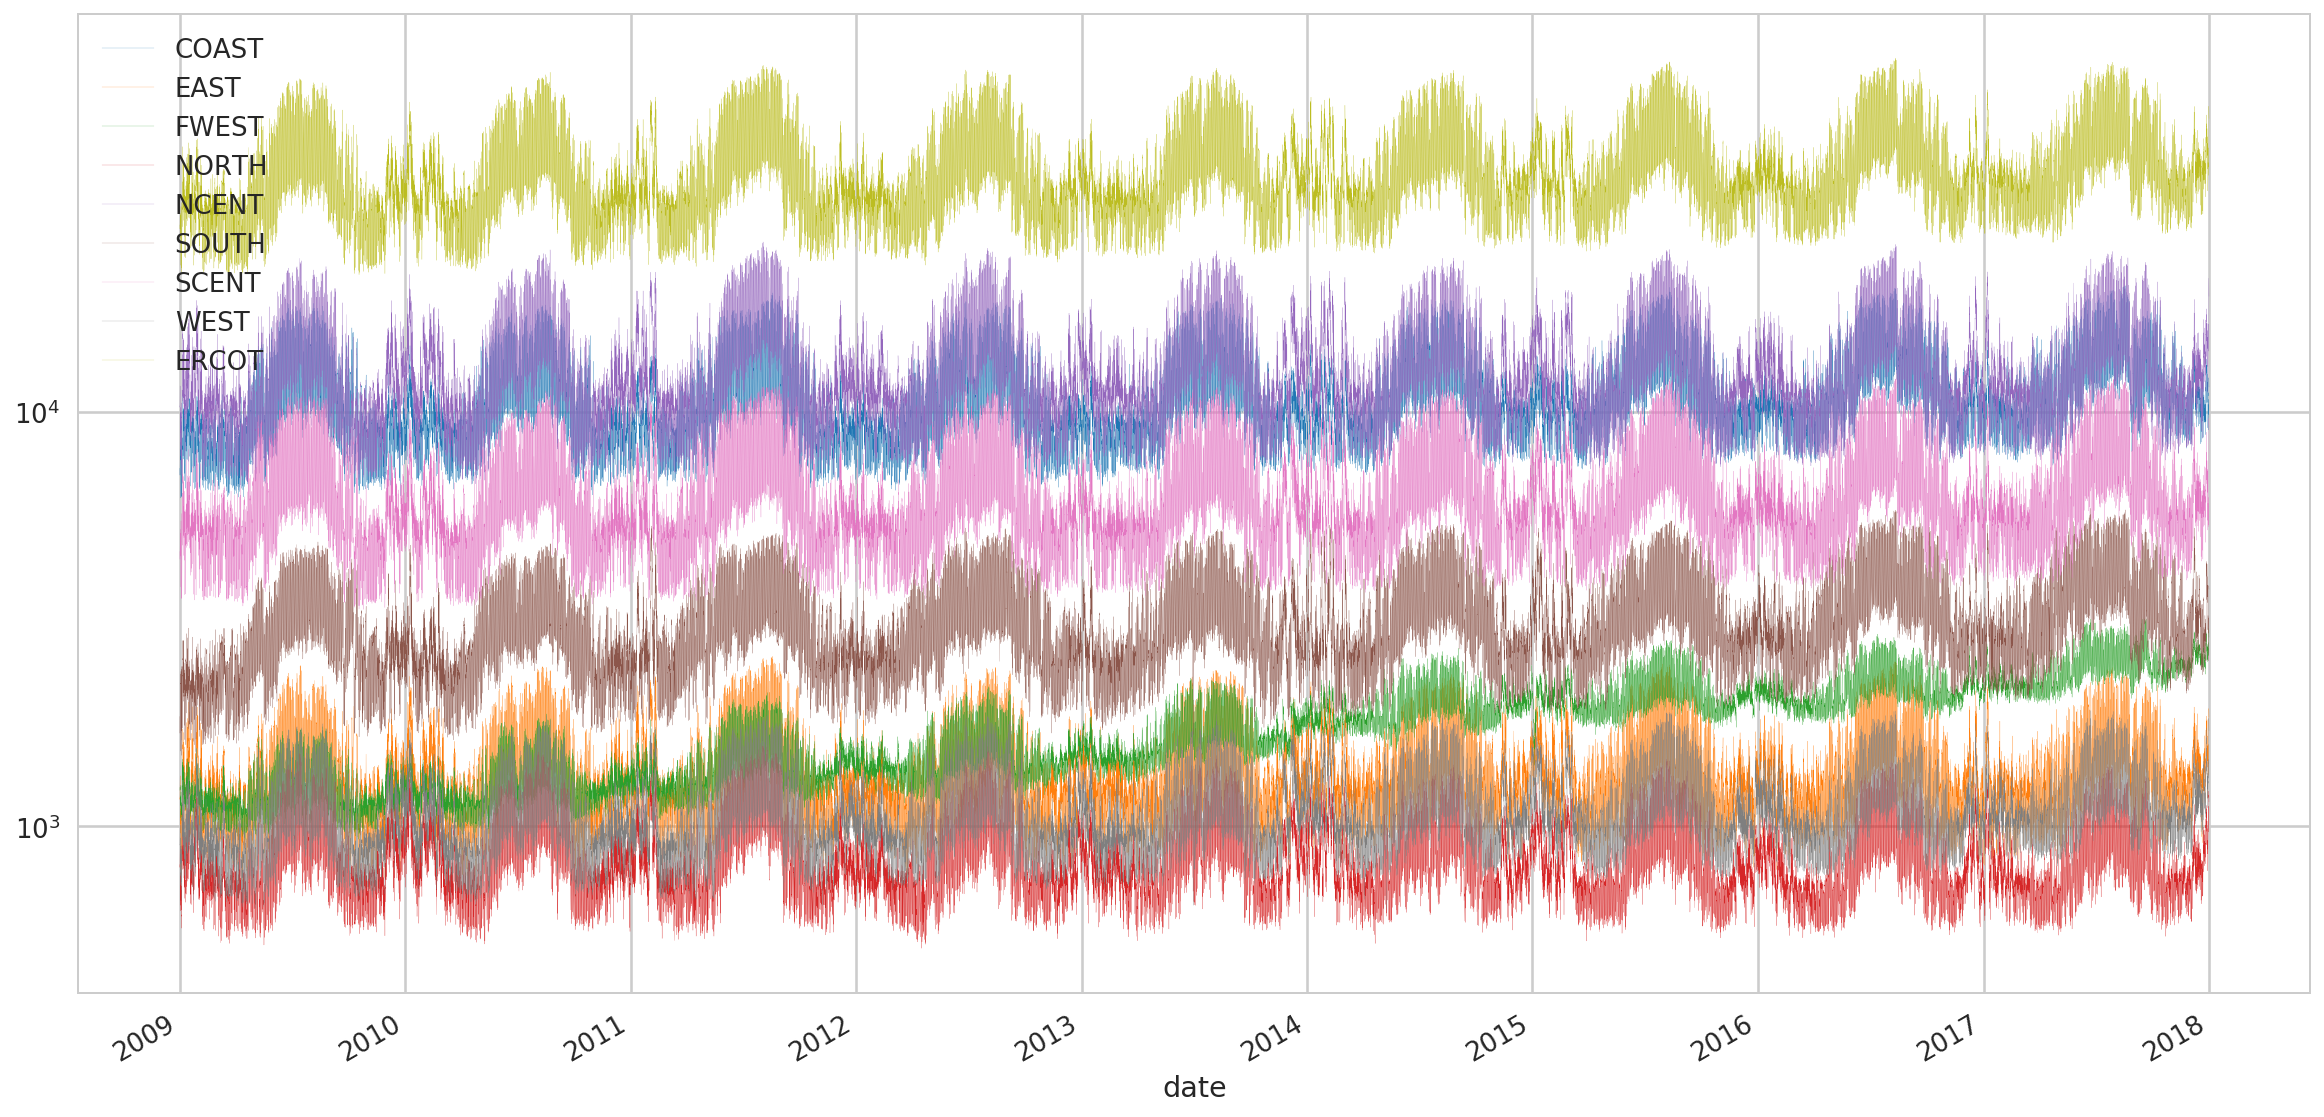

In [226]:
df.plot(figsize=(20,10), linewidth=0.1, logy=True)

In [54]:
len(df)

78888

In [224]:
df [ np.delete(df.columns.values.copy(), -1) ].sum().sum()

3012725828.394823

In [225]:
df.sum().ERCOT

3012725828.3950777

## Extracting Seasonal Components: Daily, Weekly, Yearly

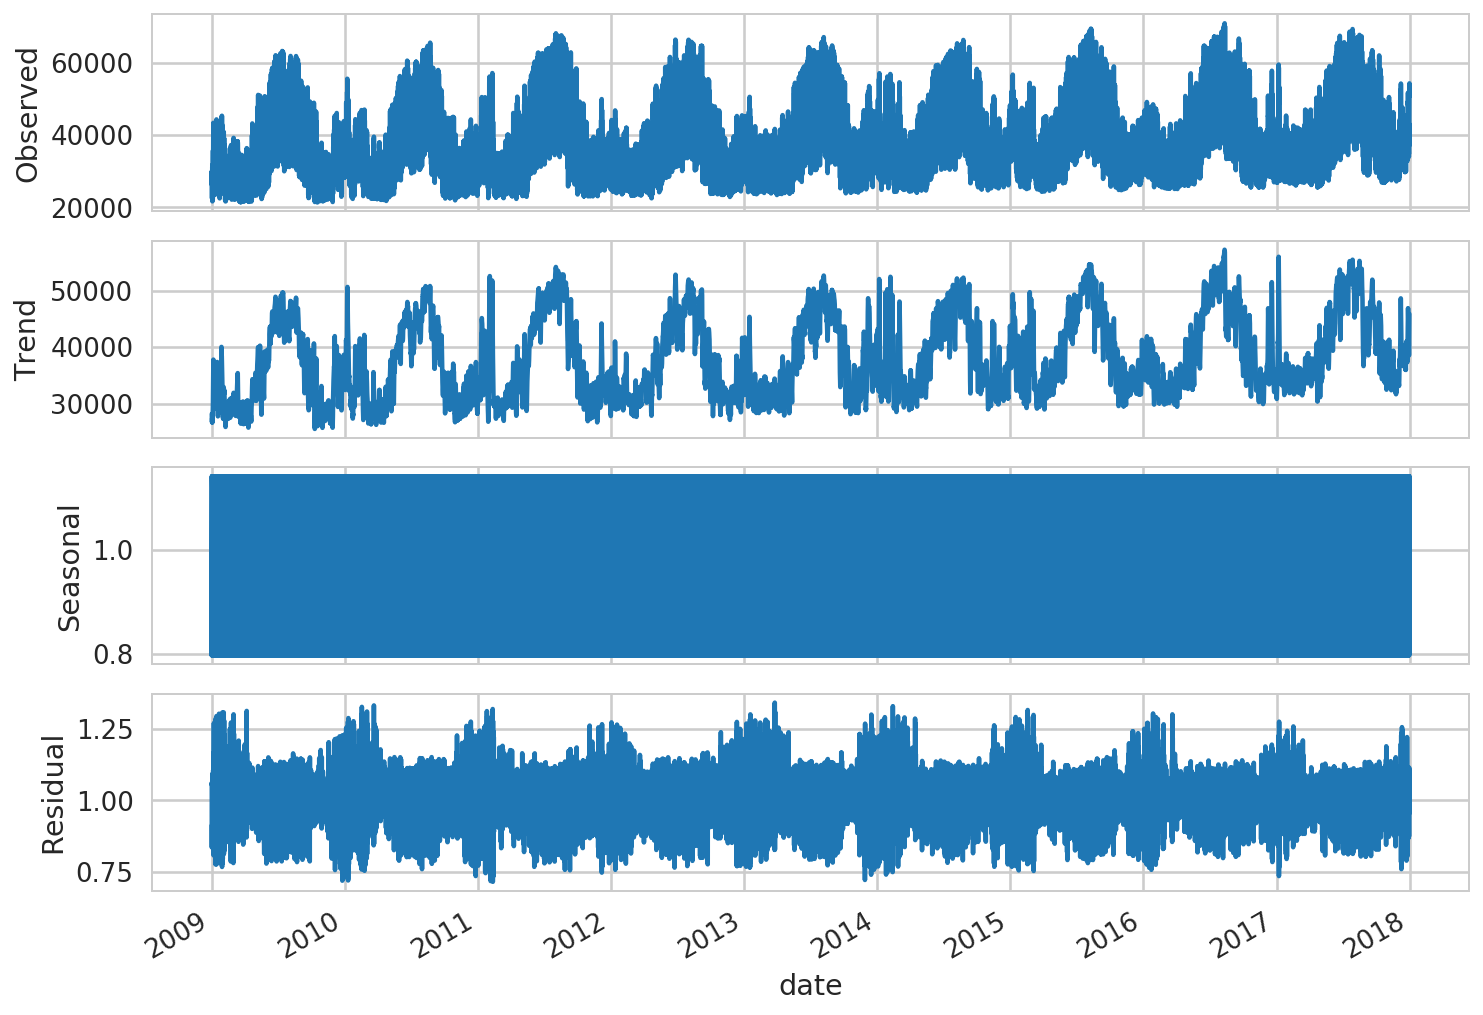

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
decomposition = seasonal_decompose(df.ERCOT, model='multiplicative', freq=24)  
fig = decomposition.plot()  

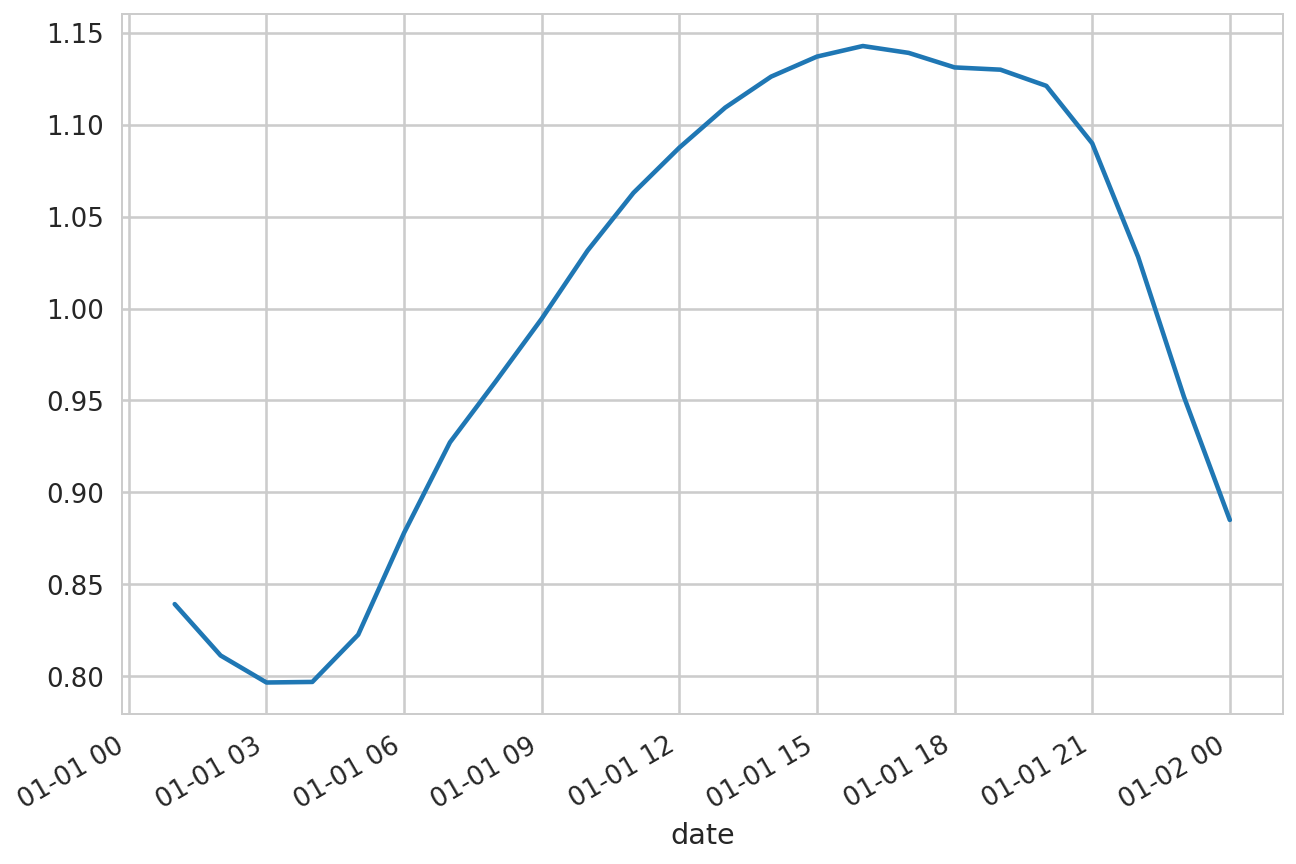

In [56]:
daily_seasonal = decomposition.seasonal.copy()
daily_seasonal[:24].plot()

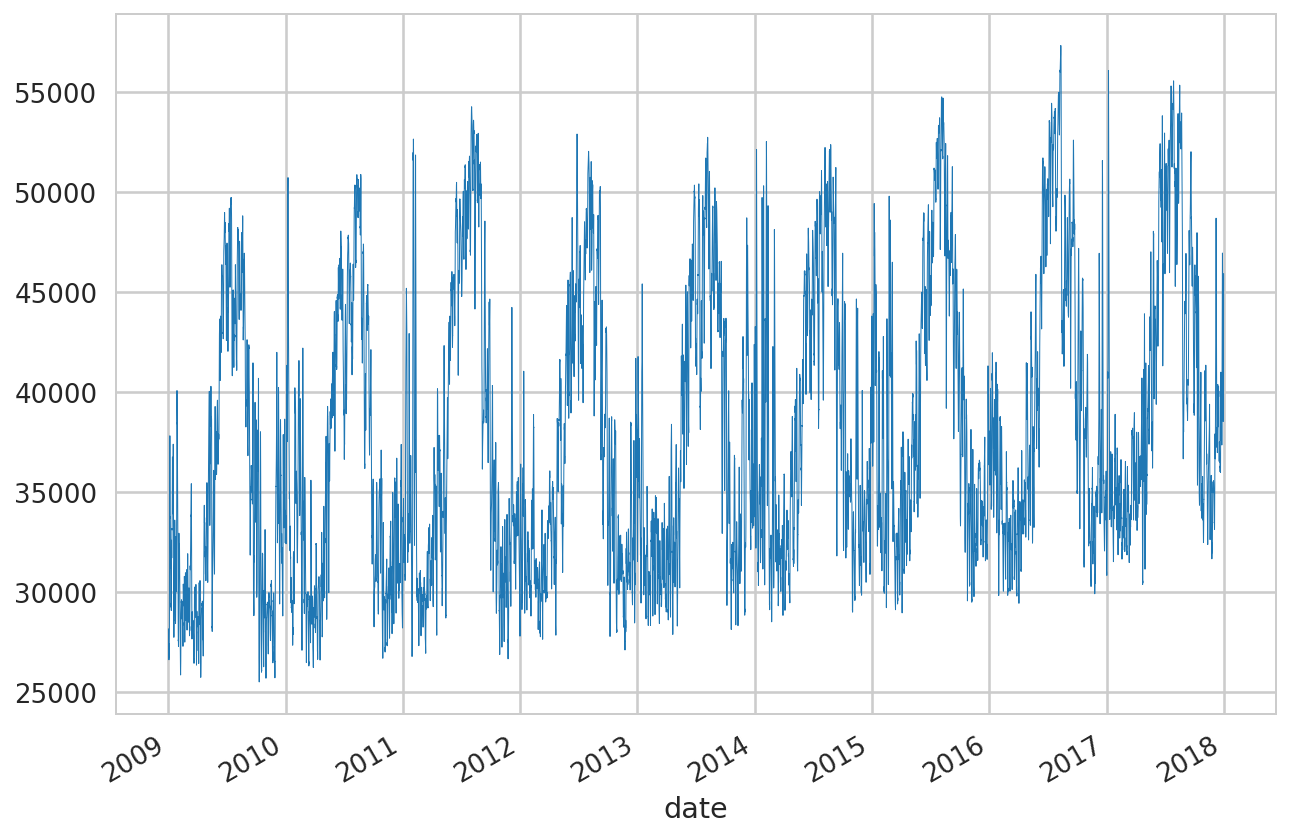

In [57]:
trend = decomposition.trend[12:-12]
trend.plot(linewidth=0.5)

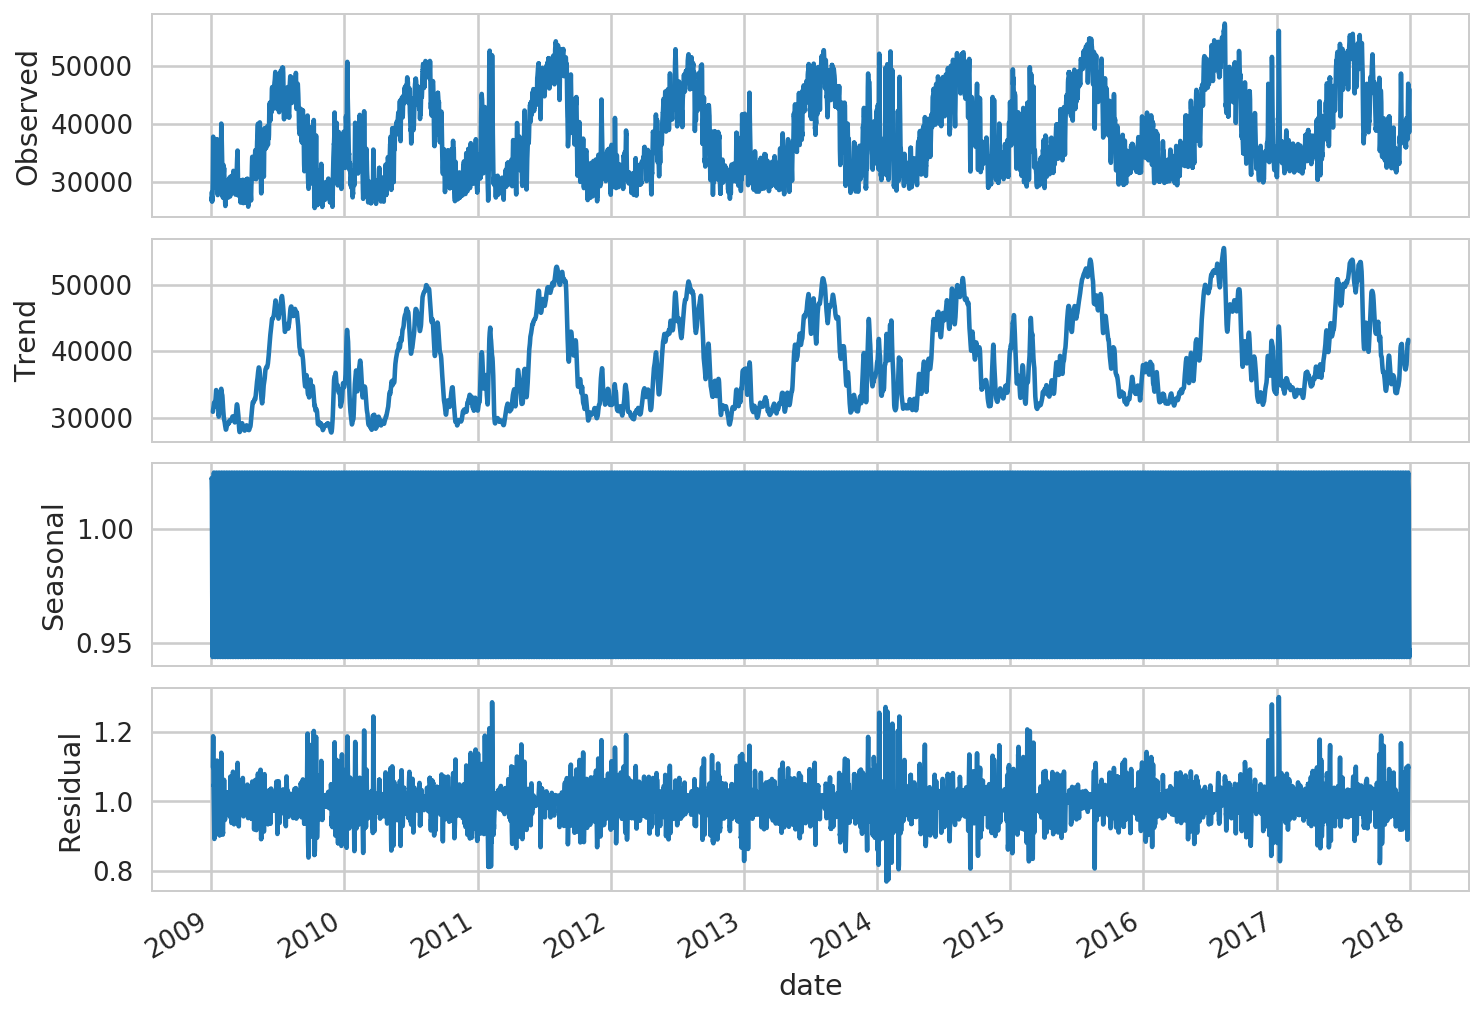

In [58]:
decomposition = seasonal_decompose(trend, model='multiplicative', freq=24*7)  
fig = decomposition.plot()  

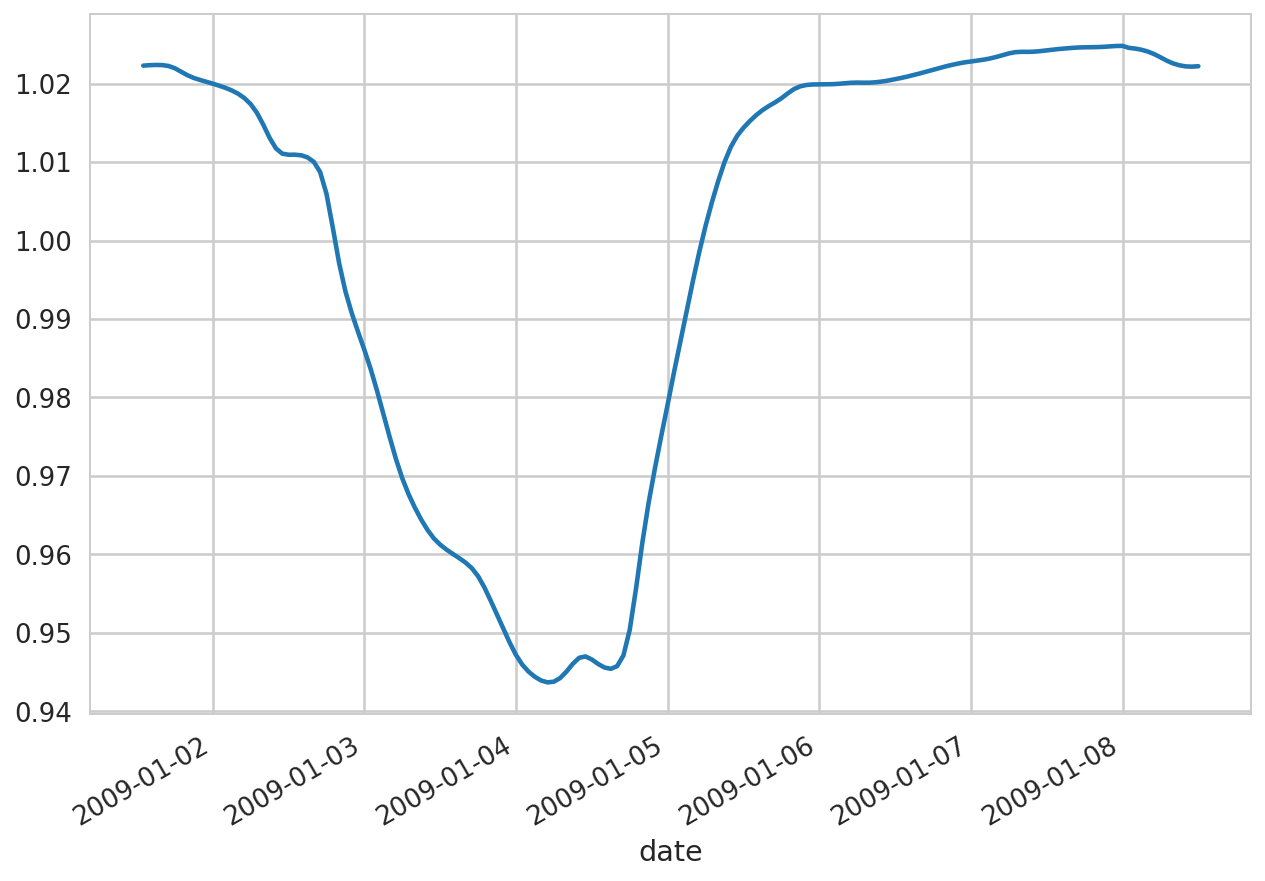

In [59]:
weekly_seasonal = decomposition.seasonal[:24*7]
weekly_seasonal.plot()

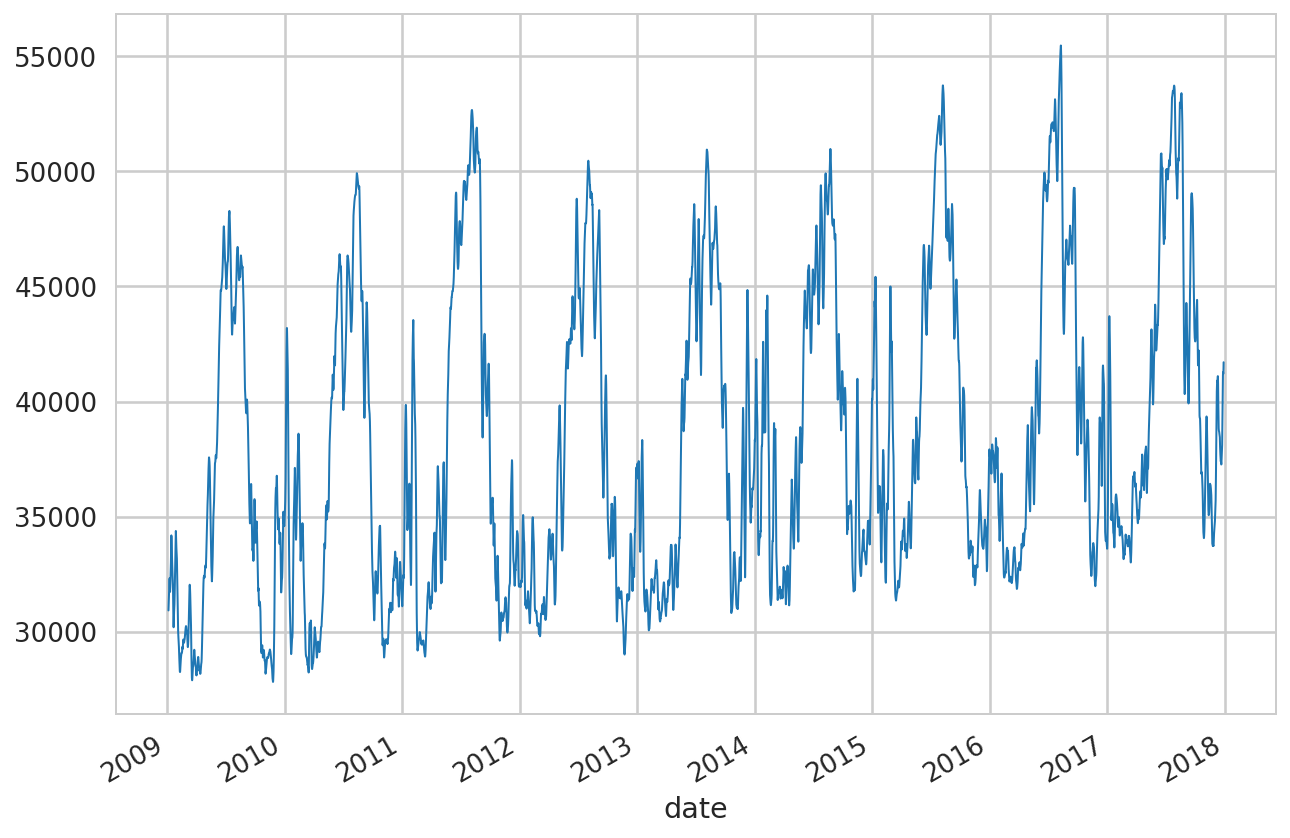

In [60]:
trend = decomposition.trend[12*7:-12*7]
trend.plot(linewidth=1)

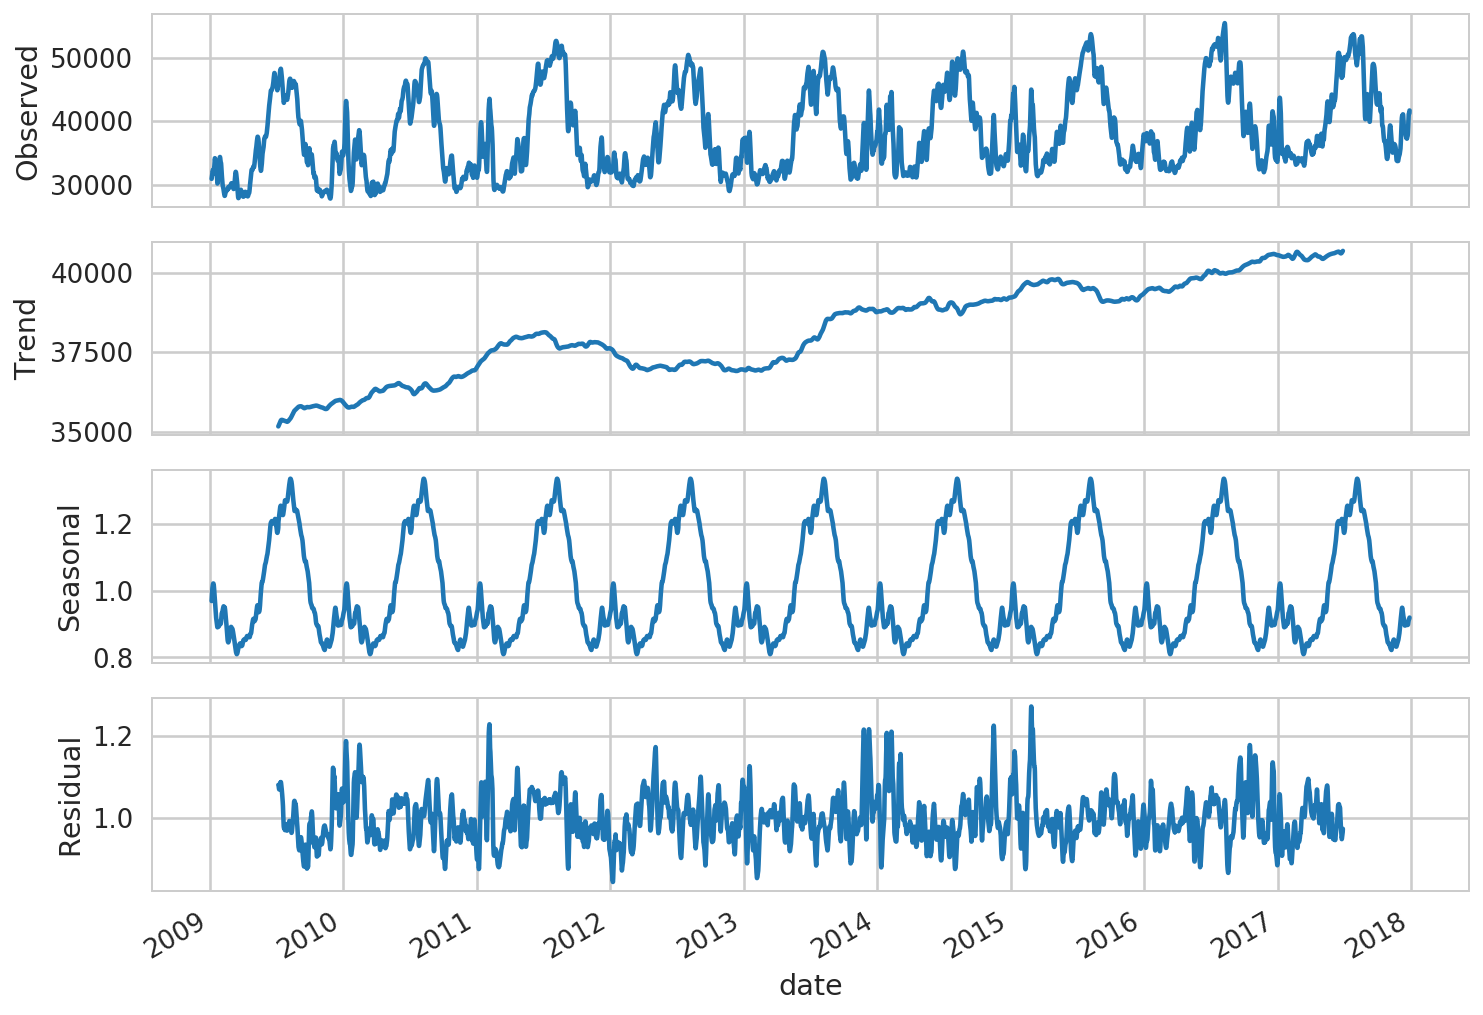

In [61]:
decomposition = seasonal_decompose(trend, model='multiplicative', freq=24*365)  
fig = decomposition.plot()  

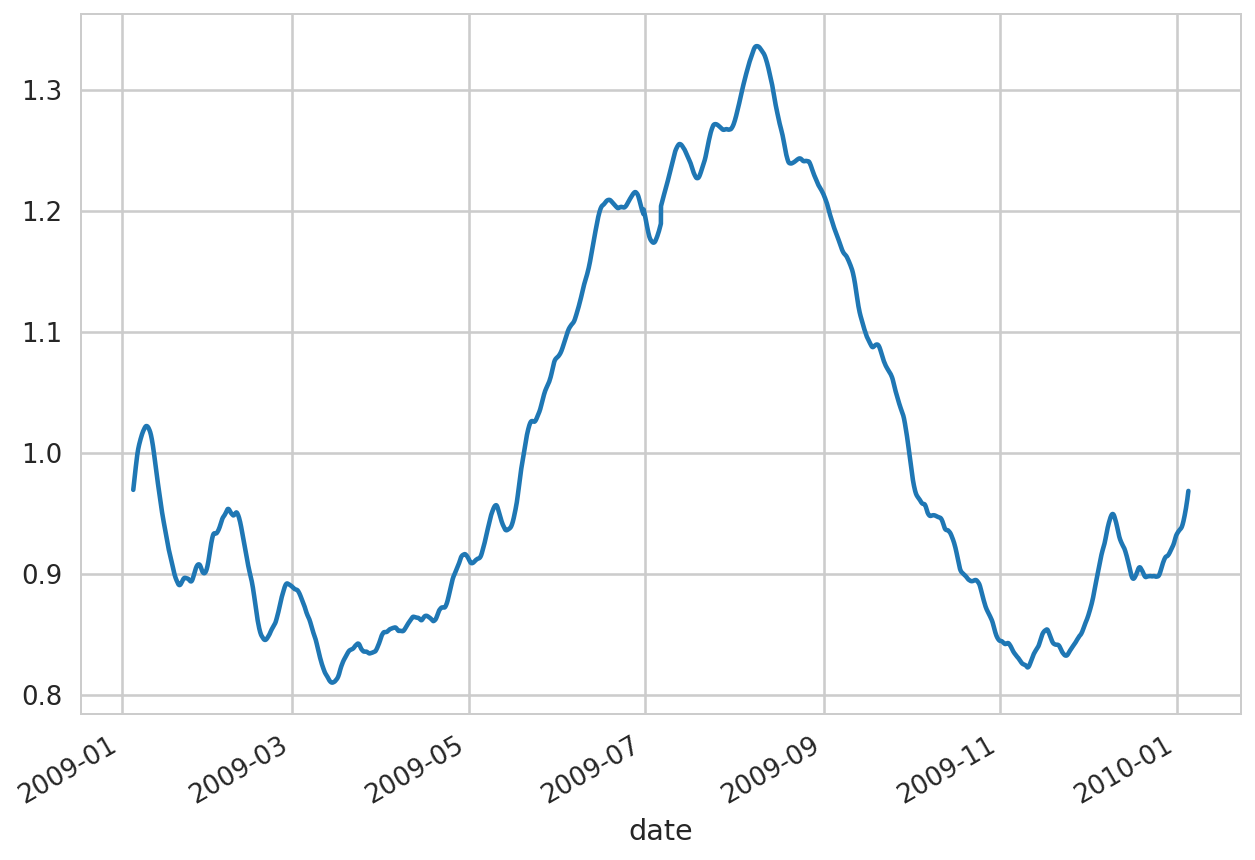

In [62]:
yearly_seasonal = decomposition.seasonal[:24*365]
yearly_seasonal.plot()

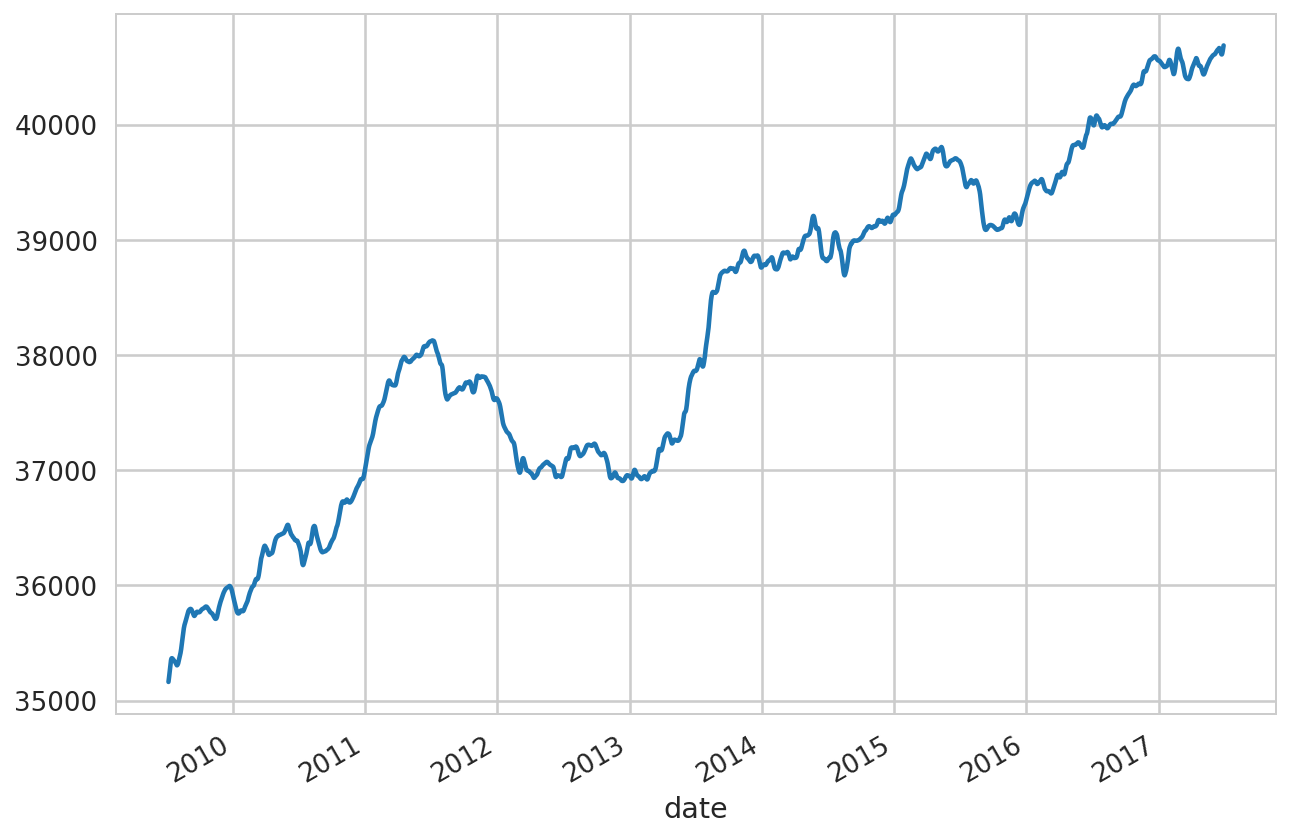

In [63]:
trend = decomposition.trend[365*12:-365*12]
trend.plot()

## FFT

In [79]:
# Detrend the original series, keeping only the seasonal components
y = (df.ERCOT[365*12+12*7+12:-(365*12+12*7+12)] - trend)
y = y - y.mean()

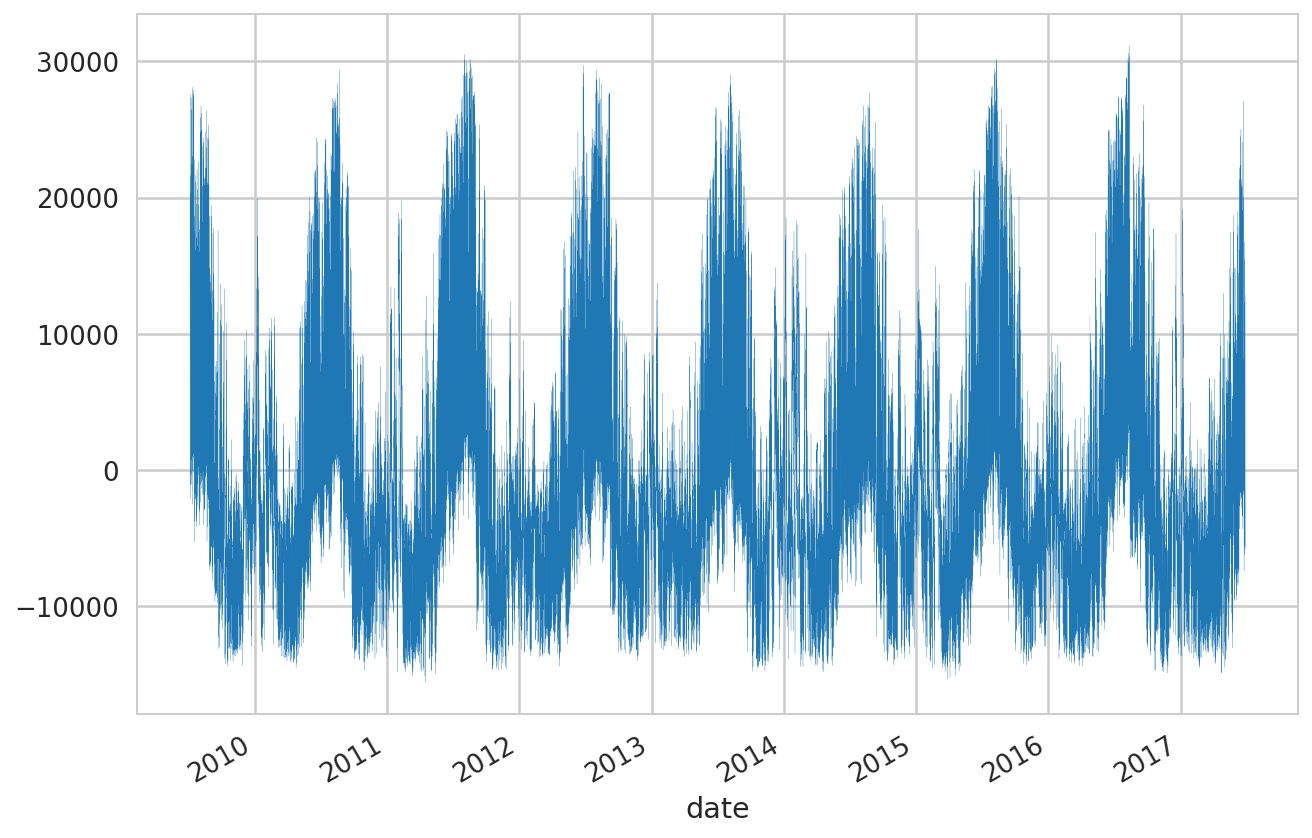

In [80]:
y.plot( linewidth = 0.1 )

In [207]:
# https://matplotlib.org/gallery/lines_bars_and_markers/spectrum_demo.html
# Apparently Matplotlib has built-in function for plotting spectrum

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# dt = 1  # sampling interval
# Fs = 1 / dt  # sampling frequency

# plot different spectrum types:
# axes[0].set_title("Magnitude Spectrum")
# axes[0].magnitude_spectrum(y, Fs=Fs, color='C1', linewidth=0.5)

# axes[1].set_title("Log. Magnitude Spectrum")
# axes[1].magnitude_spectrum(y, Fs=Fs, scale='dB', color='C1', linewidth=0.5)

In [ ]:
# https://ericstrong.org/fast-fourier-transforms-in-python/

In [110]:
import scipy
import numpy as np

In [120]:
N = len(y)

# Nyquist Sampling Criteria
T = 1 # 1 hour, inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), N//2)

yf = scipy.fftpack.dct(y)


logf = np.log(2/N * np.abs(yf[:N//2]))

In [121]:
len(x)

34968

In [126]:
x

array([0.00000000e+00, 1.42991964e-05, 2.85983928e-05, ...,
       4.99971402e-01, 4.99985701e-01, 5.00000000e-01])

In [122]:
len(logf)

34968

In [127]:
logf

array([-29.30180496,   6.40706553,   5.24258954, ...,  -0.12840857,
         1.18476566,   3.22934376])

In [166]:
log_spectrum = pd.DataFrame( list(zip(x,logf)) , columns=['Frequency', 'LogMagnitude'] )
log_spectrum['Days'] = 2 * (1/log_spectrum.Frequency) // 24
# log_spectrum.set_index('Days', inplace=True)

In [167]:
major_frequency = log_spectrum.LogMagnitude.idxmax()
log_spectrum.iloc[major_frequency] # expressed in days

Frequency         0.000229
LogMagnitude      9.428968
Days            364.000000
Name: 16, dtype: float64

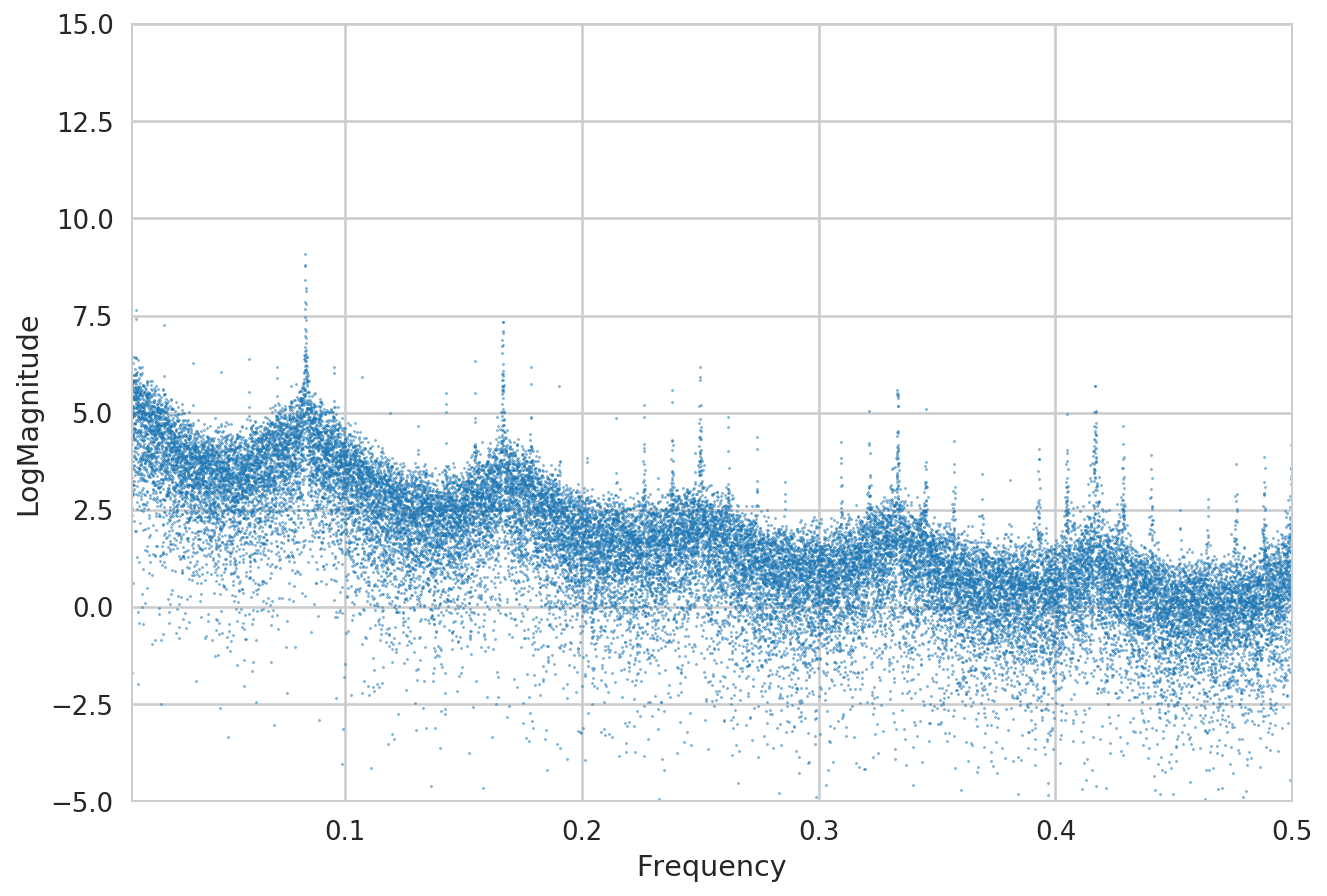

In [205]:
log_spectrum.plot.scatter(x='Frequency', y='LogMagnitude', s=1, alpha=0.5, ylim=(-5,15), xlim=(0.01,0.5))

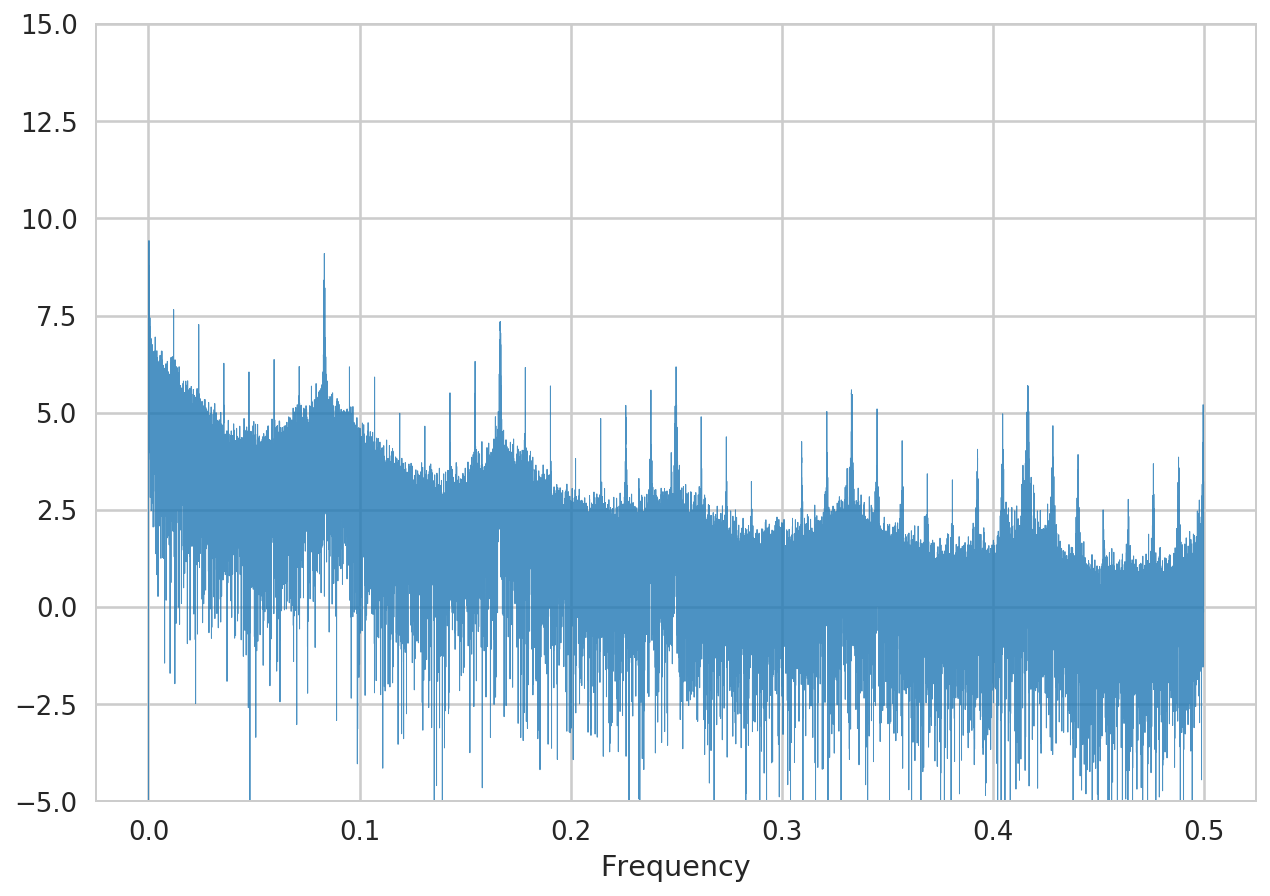

In [209]:
log_spectrum.set_index('Frequency')['LogMagnitude'].plot(linewidth=0.5, alpha=0.8, ylim=(-5,15))